# Importing modules

In [487]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox

pd.options.display.max_rows = 50

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

## Data Cleaning

### loading & exploring Data

In [488]:
re_df = pd.read_excel('Data_MidTerm_Project_Real_State_Regression.xls')

In [489]:
re_df.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [490]:
re_df.dtypes

id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

numerical:
'sqft_living', 
'sqft_lot',
'sqft_living15'
'sqft_lot15'
'sqft_above',
'sqft_basement'
'price'

categorical:
bedrooms
bathrooms
floors in integer
waterfront = categorical (yes/no)   = view?
'condition'
'grade'
'yr_built'
'yr_renovated'  = replace 0 with nan 
'zipcode'
'lat'
'long'


### droping columns

In [491]:
re_df.drop(['id'],axis=1, inplace=True)
#re_df.drop(['date'],axis=1, inplace=True)
#re_df.drop(['sqft_living'],axis=1, inplace=True)
#re_df.drop(['sqft_lot'],axis=1, inplace=True)
#re_df.drop(['lat'],axis=1, inplace=True)
#re_df.drop(['long'],axis=1, inplace=True)

### correcting data types

In [492]:
re_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   bedrooms       21597 non-null  int64         
 2   bathrooms      21597 non-null  float64       
 3   sqft_living    21597 non-null  int64         
 4   sqft_lot       21597 non-null  int64         
 5   floors         21597 non-null  float64       
 6   waterfront     21597 non-null  int64         
 7   view           21597 non-null  int64         
 8   condition      21597 non-null  int64         
 9   grade          21597 non-null  int64         
 10  sqft_above     21597 non-null  int64         
 11  sqft_basement  21597 non-null  int64         
 12  yr_built       21597 non-null  int64         
 13  yr_renovated   21597 non-null  int64         
 14  zipcode        21597 non-null  int64         
 15  lat            2159

In [493]:
#re_df["floors"] = re_df["floors"].astype(int)

### droping nan values

In [494]:
#re_df.dropna(inplace=True)

### removing duplicates

In [495]:
#re_df.drop_duplicates(inplace=True)

### Replacing null values with nan

#### years renovated

The yr_renovated column has more than 20.683 values=0. Does that make sense? .....

<AxesSubplot:>

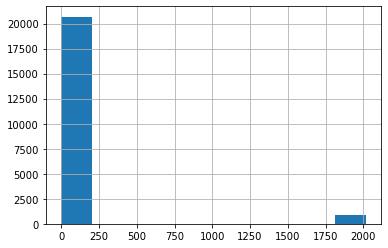

In [496]:
re_df.yr_renovated.hist()

In [497]:
#re_df["yr_renovated"].replace(0, np.nan, inplace=True)

#re_df["view"].replace(0, np.nan, inplace=True)

<AxesSubplot:>

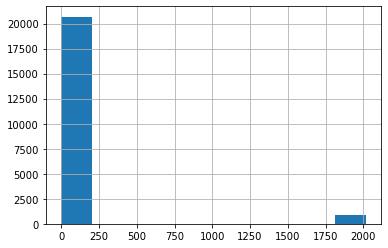

In [498]:
re_df.yr_renovated.hist()

#### square feet basement

<AxesSubplot:>

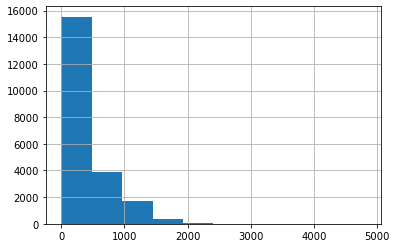

In [499]:
re_df.sqft_basement.hist()

<AxesSubplot:>

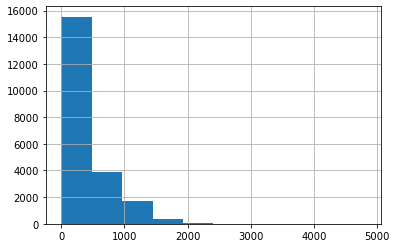

In [500]:
#re_df["sqft_basement"].replace(0, np.nan, inplace=True)
re_df.sqft_basement.hist()

### renaming waterfront column features

In [501]:
def clean_waterfront(x):
    if x == 0:
        return 'no'
    elif x == 1:
        return 'yes'

In [502]:
re_df["waterfront"] = list(map(clean_waterfront,re_df["waterfront"])) 

### removing outliers

#### bedrooms

/Users/louisarudow/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms'>

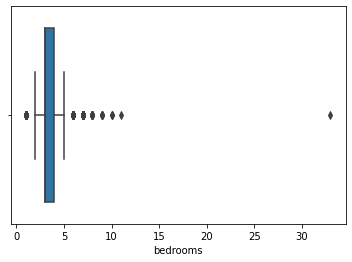

In [503]:
sns.boxplot(re_df['bedrooms'])

In [504]:
Q1 = re_df['bedrooms'].quantile(0.25)
Q3 = re_df['bedrooms'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (re_df['bedrooms'] >= Q1 - 1.5 * IQR) & (re_df['bedrooms'] <= Q3 + 1.5 *IQR)
re_df = re_df.loc[filter]

/Users/louisarudow/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms'>

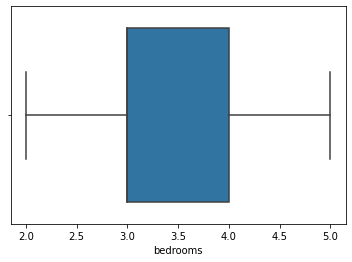

In [505]:
sns.boxplot(re_df['bedrooms'])

530 rows removed

#### bathrooms

/Users/louisarudow/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bathrooms'>

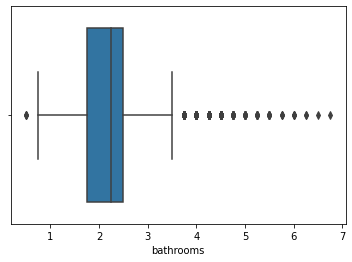

In [506]:
sns.boxplot(re_df['bathrooms'])

In [507]:
Q1 = re_df['bathrooms'].quantile(0.25)
Q3 = re_df['bathrooms'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (re_df['bathrooms'] >= Q1 - 1.5 * IQR) & (re_df['bathrooms'] <= Q3 + 1.5 *IQR)
re_df = re_df.loc[filter]

/Users/louisarudow/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bathrooms'>

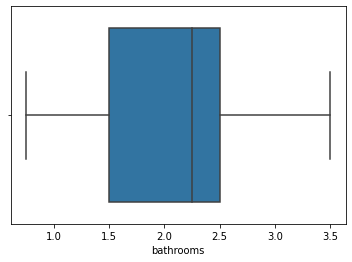

In [508]:
sns.boxplot(re_df['bathrooms'])

461 rows removed

#### further exploration

In [509]:
#re_df = re_df[re_df.sqft_above != 7420]

In [510]:
#re_df = re_df[re_df.sqft_lot15 != 560617]

## Plot the Correlation Heatmap

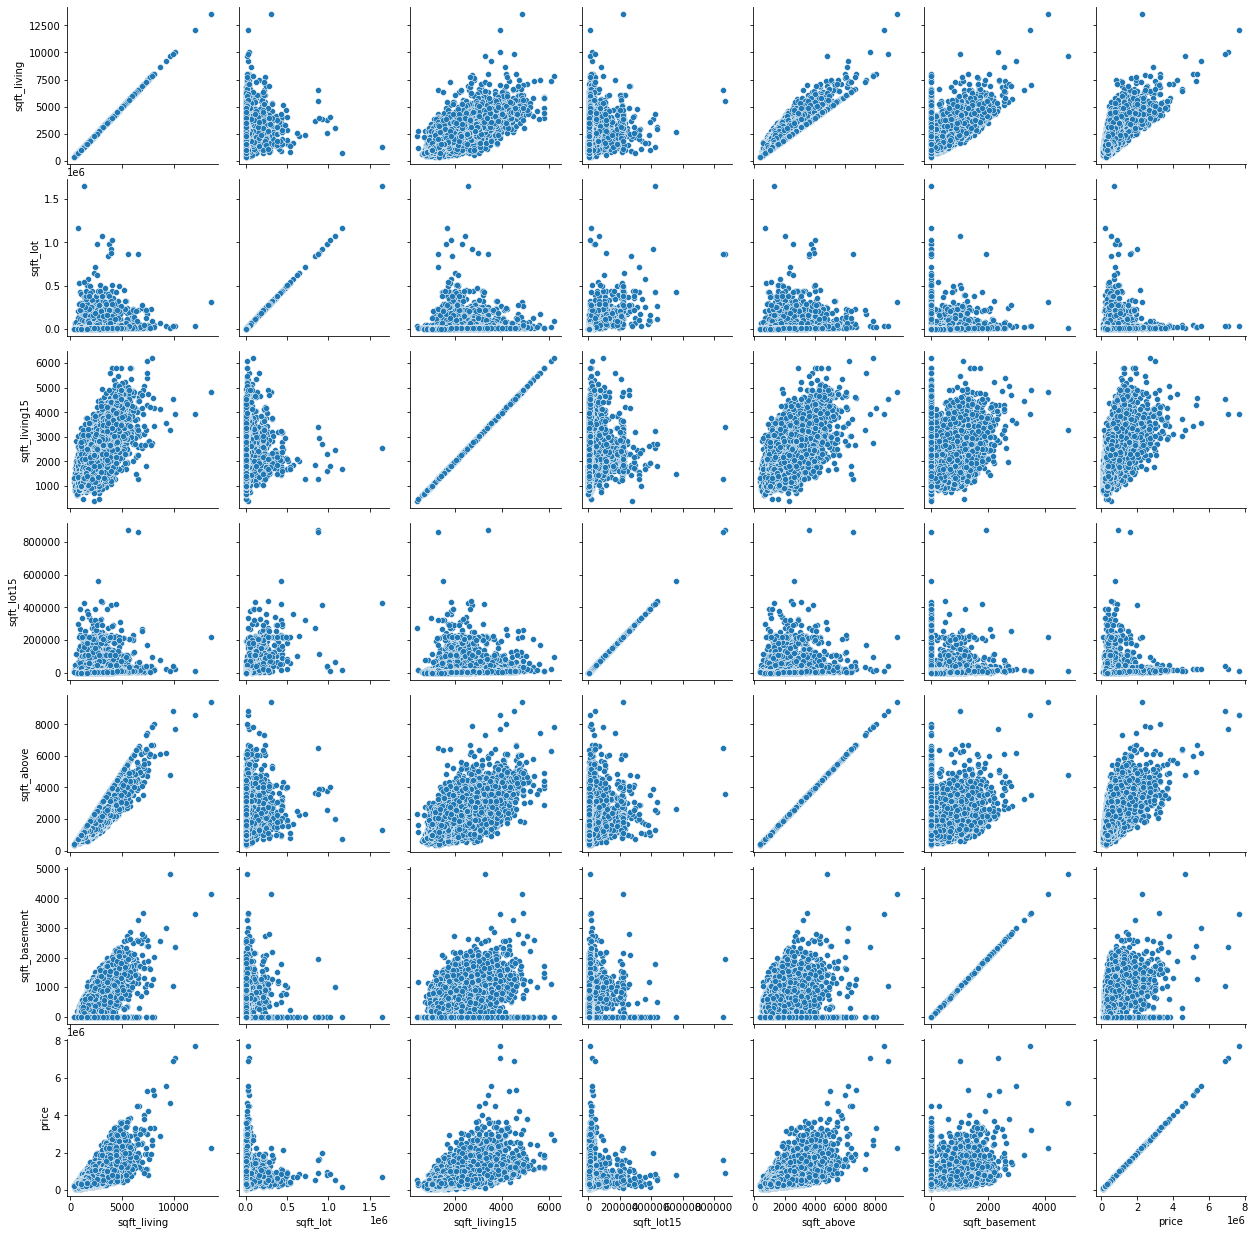

In [511]:
g = sns.PairGrid(re_numerical)
g.map(sns.scatterplot)

## X Y split

In [512]:
X=re_df.drop("price", axis=1)
y=re_df["price"]

## Data Splitting

In [513]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

In [514]:
y_train =y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

## Data Transformation

### Hot coding Categorical Variables

In [515]:
X_train_cat=X_train[['bedrooms','bathrooms','floors','waterfront','condition','grade','yr_built','yr_renovated','zipcode','lat','long']]
X_train_cat

X_test_cat=X_test[['bedrooms','bathrooms','floors','waterfront','condition','grade','yr_built','yr_renovated','zipcode','lat','long']]
X_test_cat

,bedrooms,bathrooms,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode,lat,long
4997,3,1.00,1.0,no,4,7,1955,0,98106,47.5334,-122.365
14870,2,2.00,2.0,no,3,8,1934,1979,98034,47.7162,-122.246
3276,3,1.00,1.0,no,3,7,1925,0,98103,47.6670,-122.333
18361,4,1.50,2.0,no,4,10,1910,0,98112,47.6360,-122.301
20776,2,2.00,2.0,no,3,8,2014,0,98112,47.6205,-122.299
...,...,...,...,...,...,...,...,...,...,...,...
15332,3,2.50,2.0,no,3,8,2005,0,98029,47.5478,-122.000
7987,4,2.50,2.0,no,3,7,2007,0,98042,47.3349,-122.059
12205,4,3.50,2.0,no,3,10,2008,0,98004,47.5885,-122.199
10163,3,1.00,1.0,no,4,7,1958,0,98002,47.2850,-122.206


In [516]:
X_train_cat=pd.get_dummies(X_train_cat, drop_first=True)
pd.DataFrame(OneHotEncoder(drop='first').fit_transform(X_train_cat).toarray(),
columns=OneHotEncoder(drop='first').fit(X_train_cat).get_feature_names(input_features=X_train_cat.columns))

X_test_cat=pd.get_dummies(X_test_cat, drop_first=True)
pd.DataFrame(OneHotEncoder(drop='first').fit_transform(X_test_cat).toarray(),
columns=OneHotEncoder(drop='first').fit(X_test_cat).get_feature_names(input_features=X_test_cat.columns))

,bedrooms_3,bedrooms_4,bedrooms_5,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,...,long_-121.719,long_-121.718,long_-121.714,long_-121.708,long_-121.417,long_-121.364,long_-121.352,long_-121.321,long_-121.319,waterfront_yes_1
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6177,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6178,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6179,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6180,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [517]:
X_train_cat = X_train_cat.reset_index(drop=True)
X_test_cat = X_test_cat.reset_index(drop=True)

### Standardize numerical

In [518]:
X_train_num=X_train[['sqft_living','sqft_lot','sqft_living15','sqft_lot15','sqft_above','sqft_basement']]
X_train_num

X_test_num=X_test[['sqft_living','sqft_lot','sqft_living15','sqft_lot15','sqft_above','sqft_basement']]
X_test_num

,sqft_living,sqft_lot,sqft_living15,sqft_lot15,sqft_above,sqft_basement
4997,1090,6435,1340,6435,1090,0
14870,2180,21392,2890,22000,2180,0
3276,1240,4080,2060,4080,1240,0
18361,2550,5055,1970,4431,2550,0
20776,1460,1085,1580,1202,950,510
...,...,...,...,...,...,...
15332,1480,1961,1400,1138,1480,0
7987,2320,4683,2230,5750,2320,0
12205,3720,8301,2080,9676,2880,840
10163,1864,6978,990,8000,1864,0


In [519]:
std_scaler=StandardScaler().fit(X_train_num)   ## finding the parameters (mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train_num)

In [520]:
X_test_scaled=std_scaler.transform(X_test_num)

In [521]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[ 0.89345991 -0.12550675  0.03939982 -0.30010814 -0.49842372  2.60866442]
 [-1.11346586 -0.2243807  -0.73050607 -0.27271824 -0.83135298 -0.65372417]
 [ 0.49703013  0.08863975  2.10274758  0.29112246  0.89987917 -0.65372417]
 ...
 [ 1.24033597 -0.06319205  1.56381346 -0.09550557  1.69890939 -0.65372417]
 [-0.50643276 -0.25804608 -0.69970983 -0.28116998 -1.05774488  0.91793748]
 [-0.50643276 -0.25930009  0.22417723 -0.33008052 -0.17881163 -0.65372417]]
--------
[[-1.15063115 -0.20183262 -0.96147783 -0.23613315 -0.8713045  -0.65372417]
 [ 0.19970779  0.15886436  1.42523041  0.37290088  0.58026708 -0.65372417]
 [-0.96480469 -0.25862485  0.14718664 -0.32828061 -0.67154694 -0.65372417]
 ...
 [ 2.10752611 -0.15683292  0.17798288 -0.10931791  1.51246901  1.34657248]
 [-0.19176662 -0.18873785 -1.50041195 -0.17489716  0.15944449 -0.65372417]
 [-0.24627571 -0.22679226 -0.51493242 -0.27663108 -0.69818128  0.77505915]]


In [522]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns= X_train_num.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns= X_test_num.columns)

In [523]:
X_train_scaled = X_train_scaled.reset_index(drop=True)
X_test_scaled = X_test_scaled.reset_index(drop=True)

## Concatination 

In [524]:
X_train_con=pd.concat([X_train_scaled,X_train_cat],axis=1)
X_test_con=pd.concat([X_test_scaled,X_test_cat],axis=1)

In [525]:
X_train_con

,sqft_living,sqft_lot,sqft_living15,sqft_lot15,sqft_above,sqft_basement,bedrooms,bathrooms,floors,condition,grade,yr_built,yr_renovated,zipcode,lat,long,waterfront_yes
0,0.893460,-0.125507,0.039400,-0.300108,-0.498424,2.608664,5,1.75,1.0,4,7,1945,0,98144,47.5738,-122.315,0
1,-1.113466,-0.224381,-0.730506,-0.272718,-0.831353,-0.653724,3,1.75,1.5,4,7,1925,0,98136,47.5445,-122.391,0
2,0.497030,0.088640,2.102748,0.291122,0.899879,-0.653724,4,2.50,1.0,4,9,1967,0,98004,47.6214,-122.227,0
3,1.488105,-0.250908,1.594610,-0.292282,0.580267,1.822834,4,2.50,2.0,3,9,1937,0,98199,47.6325,-122.394,0
4,0.682857,0.522359,0.655325,1.134105,1.099637,-0.653724,4,2.25,2.0,4,8,1980,0,98053,47.6555,-122.042,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14419,1.339443,0.138631,1.594610,0.384718,1.805447,-0.653724,3,2.50,1.0,3,10,1954,0,98177,47.7635,-122.377,0
14420,0.918237,-0.231615,-1.007672,-0.407359,0.060897,1.656142,4,2.25,2.0,3,7,1910,2003,98144,47.5890,-122.313,0
14421,1.240336,-0.063192,1.563813,-0.095506,1.698909,-0.653724,3,2.50,2.0,3,8,2003,0,98019,47.7440,-121.976,0
14422,-0.506433,-0.258046,-0.699710,-0.281170,-1.057745,0.917937,2,1.75,1.0,3,7,1996,0,98118,47.5565,-122.275,0


##  Apply Linear Regression

### Modelling using Statsmodels

In [526]:
X_train_const_scaled = sm.add_constant(X_train_con) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_con) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     1930.
Date:                Mon, 07 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:01:12   Log-Likelihood:            -1.9437e+05
No. Observations:               14424   AIC:                         3.888e+05
Df Residuals:                   14407   BIC:                         3.889e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -4.335e+06   3.07e+06     -1.

/Users/louisarudow/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [528]:
predictions_test

0       3.252854e+05
1       9.198201e+05
2       4.975519e+05
3       1.013678e+06
4       4.295203e+05
            ...     
6177    3.586559e+05
6178    2.567463e+05
6179    9.374046e+05
6180    2.624686e+05
6181    3.496523e+05
Length: 6182, dtype: float64

In [529]:
#display adjusted R-squared
print(model.rsquared_adj)

0.6814829313918385


### Modeling using Scikit Learn

In [530]:
model=LinearRegression()    # model
model.fit(X_train_con, y_train)   # model train

LinearRegression()

In [531]:
model.coef_

array([ 5.25936202e+04,  1.09928091e+04,  4.16087623e+04, -6.57611964e+03,
        4.06090254e+04,  2.84806181e+04, -2.90071078e+04,  1.82071467e+04,
        2.43007488e+04,  3.46467329e+04,  1.05538362e+05, -2.38793173e+03,
        3.09212202e+01, -3.81948085e+02,  5.62854929e+05, -1.58284676e+05,
        6.30654860e+05])

In [532]:
model.intercept_

-4335475.184761352

Making prediction

In [533]:
y_pred=model.predict(X_test_con)   # model prediction
##y_pred_train=model.predict(X_train_scaled)

In [534]:
y_test

0        365000
1        750000
2        625000
3        952500
4        699999
         ...   
6177     450000
6178     305000
6179    1450000
6180     235000
6181     430000
Name: price, Length: 6182, dtype: int64

In [535]:
y_pred

array([325285.44129979, 919820.08953542, 497551.88236475, ...,
       937404.63432668, 262468.55966953, 349652.30328851])

In [536]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
result

,y_test,y_pred
0,365000,3.252854e+05
1,750000,9.198201e+05
2,625000,4.975519e+05
3,952500,1.013678e+06
4,699999,4.295203e+05
...,...,...
6177,450000,3.586559e+05
6178,305000,2.567463e+05
6179,1450000,9.374046e+05
6180,235000,2.624686e+05


Linear Regression Train-test split. Standardize the data (after the data split). Apply linear regression. Model Interpretation. Model Validation Model Evaluation: MSE. RMSE. MAE. R2. Adjusted R2. Feature Importance.

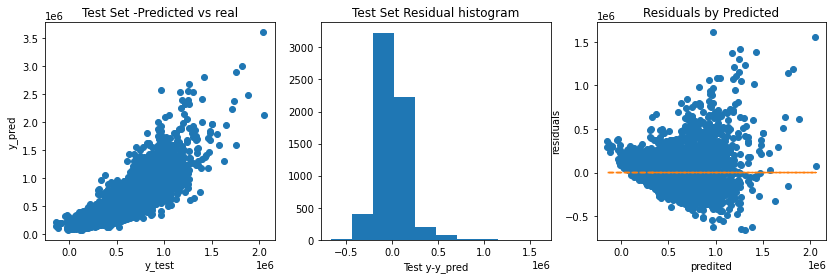

In [537]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

#### Error metrics

In [538]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

28905509423.41437
114969.72514270747


In [539]:
R2=r2_score(y_test,y_pred)
R2

0.6806296868086381

In [540]:
X_test.shape[1]

19

In [541]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.6796449357617969

#### Feature Importance

In [542]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train_con.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance')

In [543]:
features_importances

,Attribute,Importance
12,yr_renovated,30.921220
13,zipcode,381.948085
11,yr_built,2387.931732
3,sqft_lot15,6576.119645
1,sqft_lot,10992.809096
7,bathrooms,18207.146668
8,floors,24300.748755
5,sqft_basement,28480.618118
6,bedrooms,29007.107822
9,condition,34646.732910


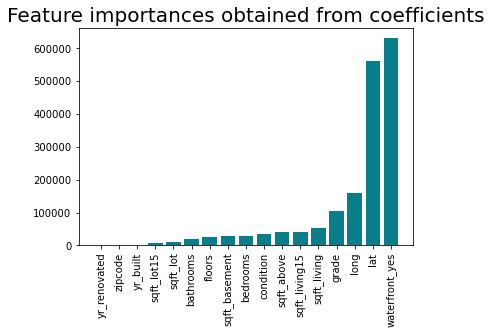

In [544]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

#### Evaluating predictions

In [545]:
# MAE: mean absolute error
MAE = np.mean( np.abs( y_test - y_pred ) )
MAE

114969.72514270715

In [546]:
# MSE: mean squared error
MSE = np.mean( np.power( y_test - y_pred , 2 ) )
MSE

28905509423.4144

In [547]:
# RMSE: root mean squared error
RMSE = np.sqrt(MSE)
RMSE

170016.20341430517